In [1]:
import pandas as pd
import matplotlib.pyplot as plt

daily = pd.read_csv("data/clean_daily_sales.csv", parse_dates=["date"])
fc = pd.read_csv("data/sku_forecasts.csv", parse_dates=["date"])
policy = pd.read_csv("data/inventory_policy.csv")

daily.head(), fc.head(), policy.head()


(     sku       date  daily_units
 0  SKU_A 2023-01-01           22
 1  SKU_A 2023-01-02           19
 2  SKU_A 2023-01-03           23
 3  SKU_A 2023-01-04           28
 4  SKU_A 2023-01-05           19,
      sku       date  forecast_units
 0  SKU_A 2025-01-01       17.556465
 1  SKU_A 2025-01-02       17.669445
 2  SKU_A 2025-01-03       17.664221
 3  SKU_A 2025-01-04       17.664462
 4  SKU_A 2025-01-05       17.664451,
      sku  annual_demand  daily_demand  std_daily_demand         eoq  \
 0  SKU_A    3179.498094      8.710954               5.0  398.716572   
 1  SKU_B    6286.368320     17.222927               5.0  560.641076   
 2  SKU_C    8776.023814     24.043901               5.0  662.420705   
 3  SKU_D    2618.264910      7.173329               5.0  361.819355   
 
    safety_stock  reorder_point  
 0     30.772394     152.725745  
 1     30.772394     271.893370  
 2     30.772394     367.387006  
 3     30.772394     131.198993  )

Showing SKU: SKU_A


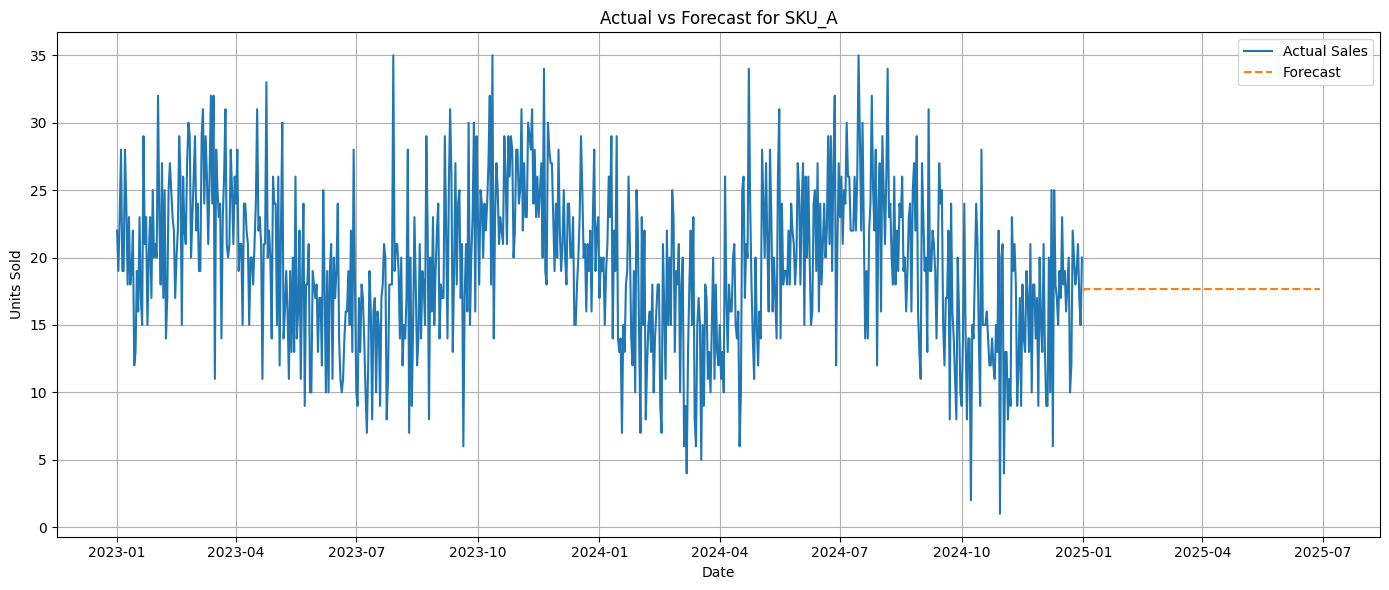

In [2]:
# Pick one SKU to visualize
sku = daily["sku"].unique()[0]
print("Showing SKU:", sku)

daily_sku = daily[daily["sku"] == sku]
fc_sku = fc[fc["sku"] == sku]

plt.figure(figsize=(14, 6))
plt.plot(daily_sku["date"], daily_sku["daily_units"], label="Actual Sales")
plt.plot(fc_sku["date"], fc_sku["forecast_units"], label="Forecast", linestyle="--")
plt.title(f"Actual vs Forecast for {sku}")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


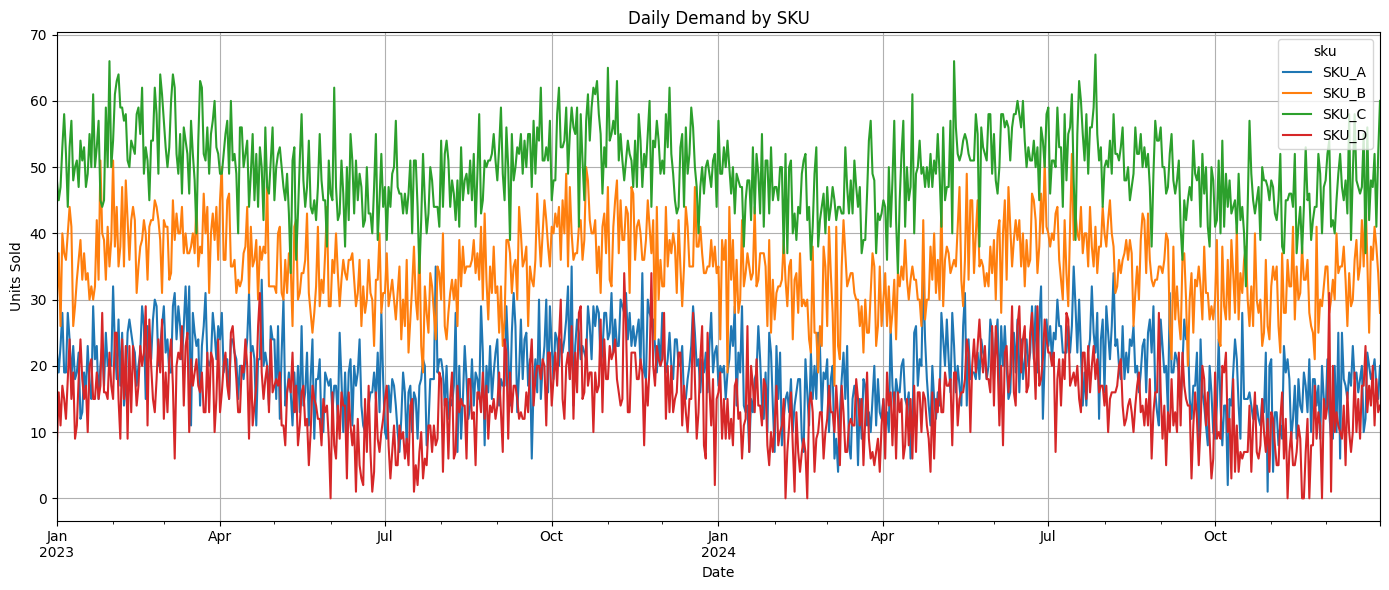

In [3]:
pivot = daily.pivot(index="date", columns="sku", values="daily_units")

plt.figure(figsize=(14, 6))
pivot.plot(ax=plt.gca())
plt.title("Daily Demand by SKU")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.grid()
plt.tight_layout()
plt.show()


In [4]:
policy[["sku", "annual_demand", "eoq", "safety_stock", "reorder_point"]].round(2)


,sku,annual_demand,eoq,safety_stock,reorder_point
0,SKU_A,3179.50,398.72,30.77,152.73
1,SKU_B,6286.37,560.64,30.77,271.89
2,SKU_C,8776.02,662.42,30.77,367.39
3,SKU_D,2618.26,361.82,30.77,131.20


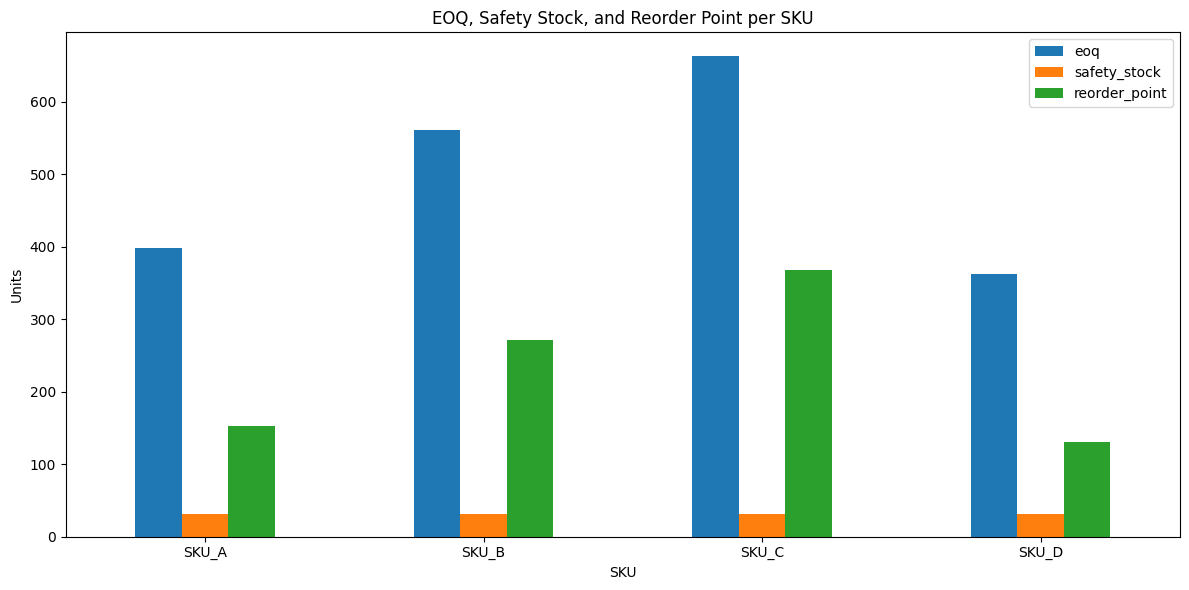

In [5]:
plt.figure(figsize=(12, 6))
policy.set_index("sku")[["eoq", "safety_stock", "reorder_point"]].plot(kind="bar", ax=plt.gca())
plt.title("EOQ, Safety Stock, and Reorder Point per SKU")
plt.xlabel("SKU")
plt.ylabel("Units")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


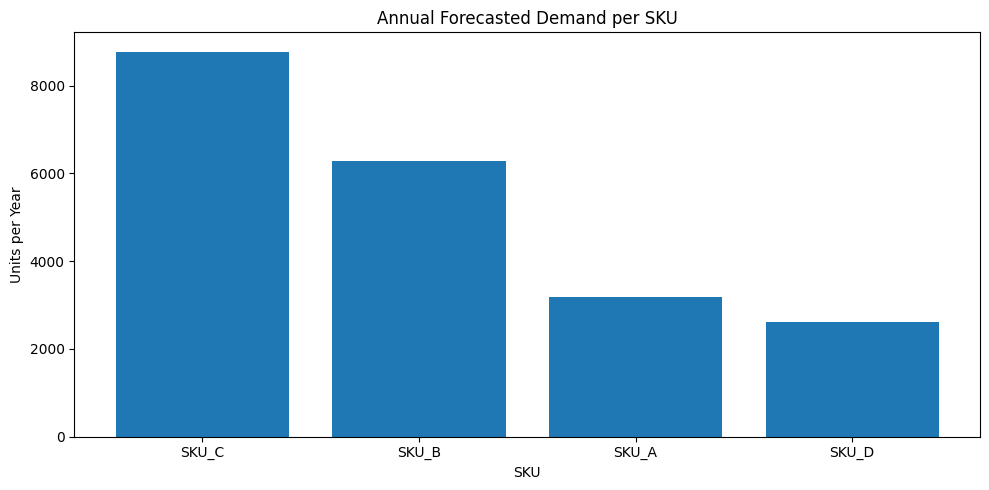

In [6]:
top = policy.sort_values("annual_demand", ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(top["sku"], top["annual_demand"])
plt.title("Annual Forecasted Demand per SKU")
plt.xlabel("SKU")
plt.ylabel("Units per Year")
plt.tight_layout()
plt.show()
